# Projek Analisis Data: [Bike-sharing-dataset]

#### Nama : Nurul Cahyani
#### Email : 1207010048@student.uinsgd.ac.id
#### ID Dicoding: Nurul Cahyani

# Defining the Business Question

#### Question 1 : How is the overall daily usage of the bike-sharing?
#### Question 2 : what is comparison between weekday and weekend bike-sharing?
#### Question 3 : When is the busiest time for bike-sharing?
#### Question 4 : How the seasons affect bike-sharing ?

# Import Packages/Library

In [2]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 441.3 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/9.8 MB 441.3 kB/s eta 0:00:22
   --- ------------------------------------ 0.8/9.8 MB 578.7 kB/s eta 0:00:16
   ---- ----------------------------------- 1.0/9.8 MB 689.2 kB/s eta 0:00:1

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')
from statsmodels.tsa.seasonal import seasonal_decompose

# Data Wrangling

## Gathering Data

In [5]:
day_df = pd.read_csv("C:\\Users\\nurul\\Downloads\\Bike-sharing-dataset\\day.csv")
day_df.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
hour_df = pd.read_csv("C:\\Users\\nurul\\Downloads\\Bike-sharing-dataset\\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### insight
data relates to quantity, time and circumstance

## Assessing Data

### Assesing day_df 

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("duplicated data : ", day_df.duplicated().sum())

duplicated data :  0


In [8]:
day_df[['casual', 'registered', 'cnt']].describe()

,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


In [9]:
#change typedata of dteday to timedate
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Assessing hour_df

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [14]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
hour_df.duplicated().sum()

np.int64(0)

In [16]:
hour_df[['casual', 'registered', 'cnt']].describe()

,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


#### insight
data is already clean enough, only need to change the data type of the dteday column from object to

## Exploratory Data Analysis (EDA)

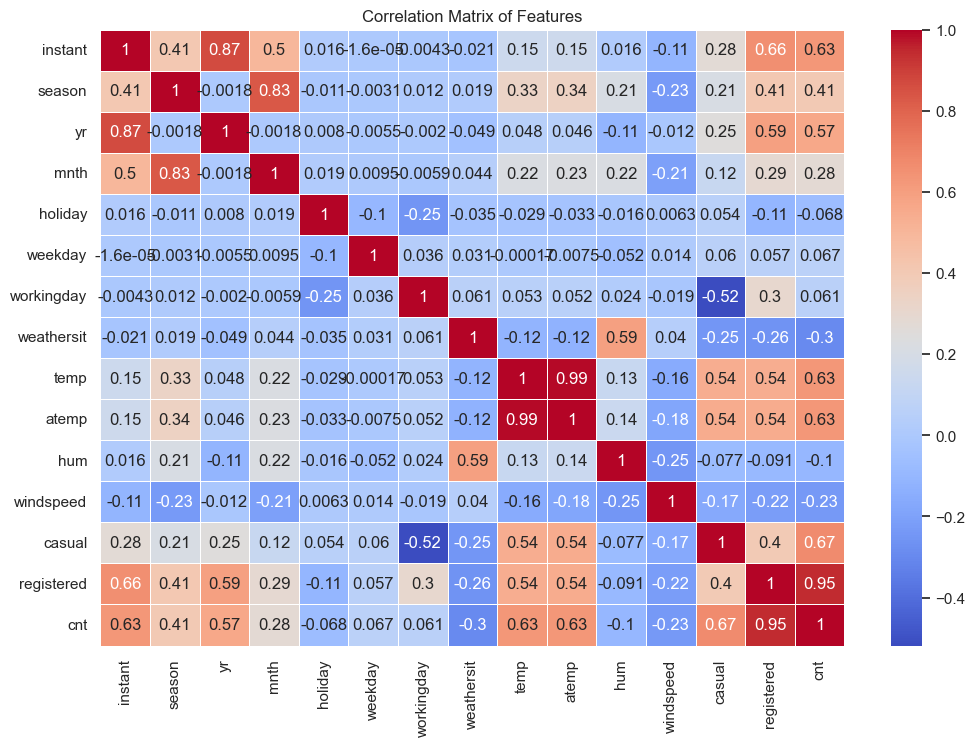

In [17]:
# Correlation matrix
numerical_data = day_df.select_dtypes(include=[np.number])
corr_matrix = numerical_data.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

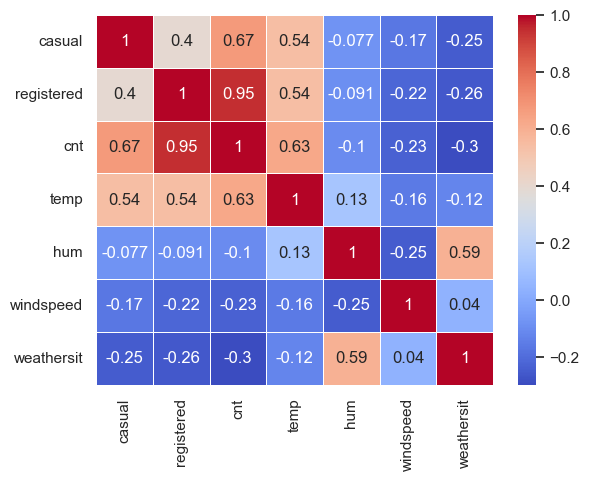

In [18]:
corr_matrix = day_df[['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed', 'weathersit']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [9]:
day_df[['dteday','cnt']]

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [19]:
#count sum of cnt every season
byseason_df =day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)
print(byseason_df)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64


In [20]:
#count sum of cnt every day
day_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)


weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

In [20]:
day_df.groupby('workingday').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

,workingday,casual,registered
0,0,316732,683537
1,1,303285,1989125


In [21]:
#count sum of cnt every month
day_df.groupby('mnth').agg({'cnt': 'sum'}).reset_index()

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


In [22]:

monthly_sharing_df = hour_df.resample(rule='ME', on='dteday').agg({
    "cnt": "sum"
})
monthly_sharing_df.index = monthly_sharing_df.index.strftime('%Y-%m')
monthly_sharing_df = monthly_sharing_df.reset_index()

monthly_sharing_df.head(12)

,dteday,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


In [23]:
#count sum of cnt every hour
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=True)

hr
4       4428
3       8174
5      14261
2      16352
1      24164
0      39130
6      55132
23     63941
22     95612
21    125445
10    126257
11    151320
7     154171
9     159438
20    164550
14    175652
15    183149
12    184414
13    184919
19    226789
16    227748
8     261001
18    309772
17    336860
Name: cnt, dtype: int64

In [24]:
day_df.sort_values(by="temp", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
553,554,2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840
203,204,2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285
202,203,2011-07-22,3,0,7,0,5,1,1,0.848333,0.840896,0.580417,0.133100,562,2825,3387
209,210,2011-07-29,3,0,7,0,5,1,1,0.838333,0.785967,0.542500,0.174138,670,3176,3846
545,546,2012-06-29,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
23,24,2011-01-24,1,0,1,0,1,1,1,0.097391,0.117930,0.491739,0.158330,86,1330,1416
22,23,2011-01-23,1,0,1,0,0,0,1,0.096522,0.098839,0.436522,0.246600,150,836,986


In [25]:
season_df=day_df.groupby('season').agg({
    "casual" : "mean",
    "registered" : "mean",
    "cnt" : "mean"
}).sort_values(by="cnt", ascending=False).reset_index()

print(season_df)


   season       casual   registered          cnt
0       3  1202.611702  4441.691489  5644.303191
1       2  1106.097826  3886.233696  4992.331522
2       4   729.112360  3999.050562  4728.162921
3       1   334.928177  2269.204420  2604.132597


In [26]:
weather_df=day_df.groupby(by="weathersit").agg({
    "casual" : "mean",
    "registered" : "mean",
    "cnt" : "mean"
}).sort_values(by="cnt", ascending=False).reset_index()

print(weather_df)

   weathersit      casual   registered          cnt
0           1  964.030238  3912.755940  4876.786177
1           2  687.352227  3348.510121  4035.862348
2           3  185.476190  1617.809524  1803.285714


#### Insight
1. large users correlate with time as hour, day, month, and season
2. most users rent bike on weekends
3. the most number of users by hour is at 17
4. Summer is the season when most rentals are made

## Visualization

### Question 1

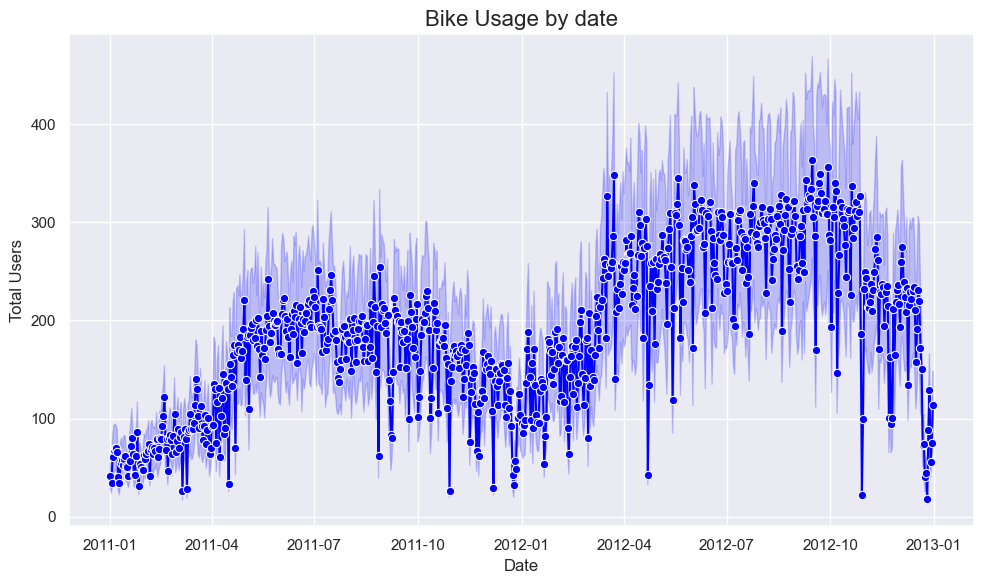

In [27]:
monthly_usage = day_df.groupby('dteday').agg({'cnt': 'sum'}).reset_index()

# Plot the data using Seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='dteday', y='cnt', data=hour_df, marker='o', color='blue')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

# Customize the plot
plt.title('Bike Usage by date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Users', fontsize=12)
#plt.xticks(ticks=range(1, 13), labels=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'des'])
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Question 2

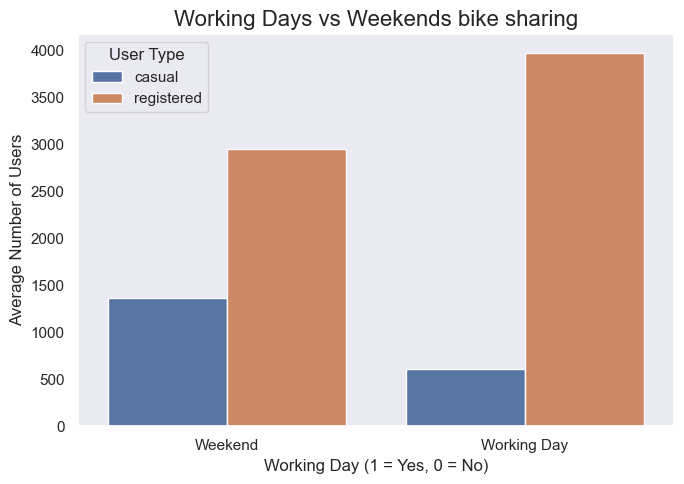

In [28]:
# Group by workingday (1 = working day, 0 = non-working day) and calculate the average number of casual and registered users
usage_by_workingday = day_df.groupby('workingday').agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Melt the DataFrame to facilitate easier plotting
usage_melted = usage_by_workingday.melt(id_vars='workingday', value_vars=['casual', 'registered'], 
                                        var_name='User Type', value_name='Average Users')

# Plot the data using seaborn
plt.figure(figsize=(7,5))
sns.barplot(x='workingday', y='Average Users', hue='User Type', data=usage_melted)

# Customize the plot
plt.title('Working Days vs Weekends bike sharing', fontsize=16)
plt.xlabel('Working Day (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Average Number of Users', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Weekend', 'Working Day'])  # Rename x-axis labels
plt.legend(title='User Type')

# Show the plot
plt.tight_layout()
plt.show()

### Question 3

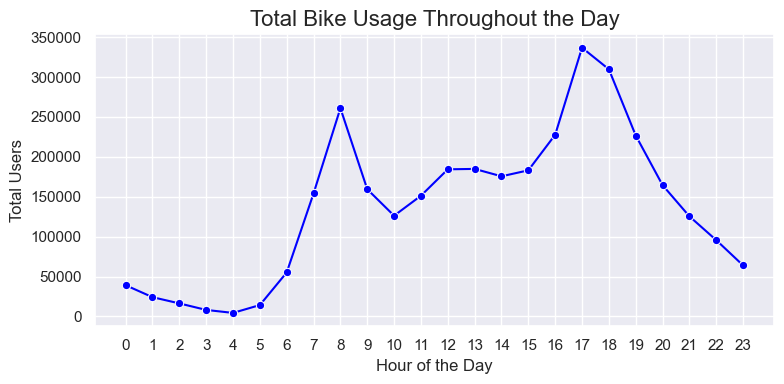

In [29]:
# Group data by hour and sum the total count of users
hourly_usage = hour_df.groupby('hr').agg({'cnt': 'sum'}).reset_index()

# Plot the data using Seaborn
plt.figure(figsize=(8,4))
sns.lineplot(x='hr', y='cnt', data=hourly_usage, marker='o', color='blue')

# Customize the plot
plt.title('Total Bike Usage Throughout the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Users', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[str(i)  for i in range(24)]) 
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Question 4

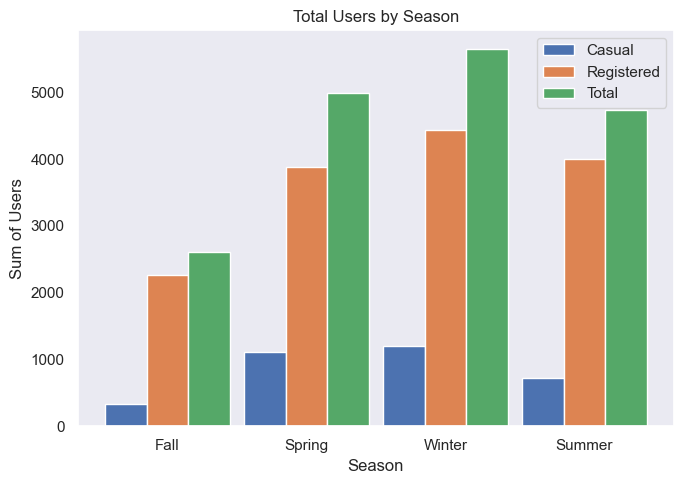

In [30]:
# Plot the data as a bar chart
plt.figure(figsize=(7,5))
bar_width = 0.3
index = season_df['season']

# Bar plot for casual, registered, and cnt
plt.bar(index - bar_width, season_df['casual'], width=bar_width, label='Casual')
plt.bar(index, season_df['registered'], width=bar_width, label='Registered')
plt.bar(index + bar_width, season_df['cnt'], width=bar_width, label='Total')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Sum of Users')
plt.title('Total Users by Season')
plt.xticks(index, ['Winter', 'Spring', 'Summer', 'Fall'])  # Rename the x-axis labels to season names
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

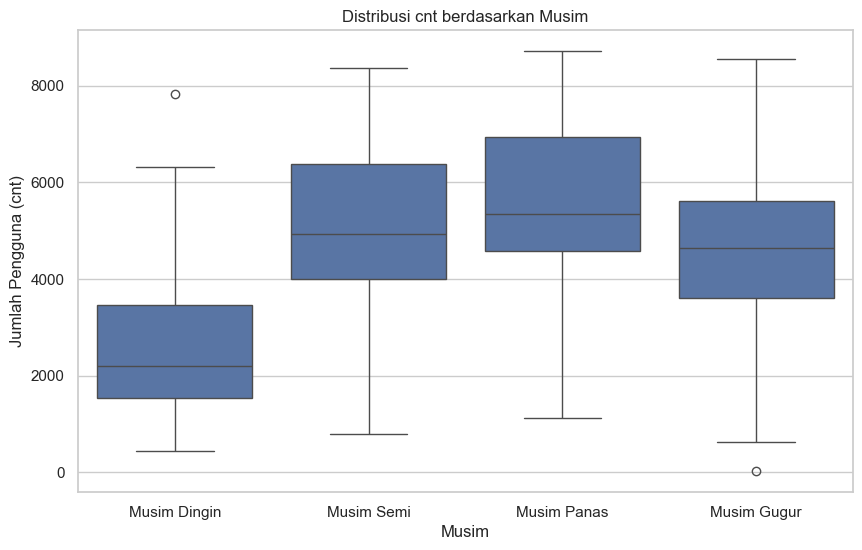

In [17]:

# Visualisasi menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Distribution cnt by season')
plt.xlabel('Season')
plt.ylabel('cnt')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

### Time Series Analysis (analisis lanjutan)

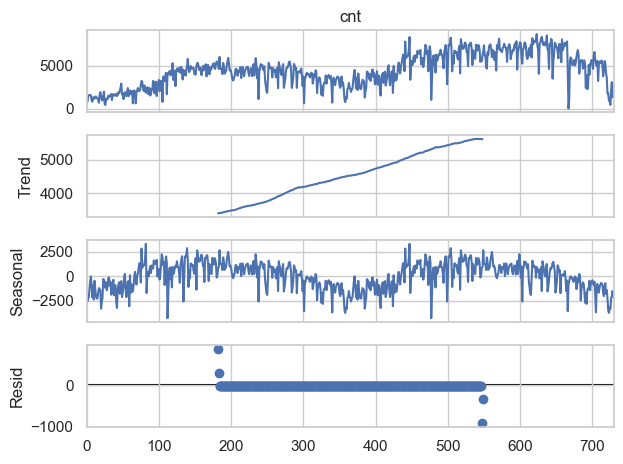

In [15]:
# Decomposition
decomposition = seasonal_decompose(day_df['cnt'], model='additive', period=365)

# the plot
decomposition.plot()
plt.show()


## Conclusion

1. daily usage of bike sharing is fluctuated
2. most users rent bike on non-workdays or weekend, this may be users using bike as a means of recreation.
3. the busiest time for bike sharing is at 17
4. the effect of season gives an implied meaning, where users rent a lot of bike in the summer, this is because in this season the bike is more comfortable to use.
5. based on time series analysis users (cnt) fluctuate but show an increasing trend over time, besides that the effect of the season shows a periodic pattern of ups and downs of users then the resudial component captures most of the data even though there are some outliers

In [3]:
print(pd.__version__)

2.2.2


In [11]:
print(np.__version__)
print(sns.__version__)
print(plt.__version__)

1.26.4
0.13.2


AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

In [12]:
print(st.__version__)

1.38.0


In [13]:
print(plt.__version__)

AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

In [14]:
import matplotlib
print(matplotlib.__version__)

3.9.2
